In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# 1. 데이터 불러오기
file_path = 'C:\\Users\\PC\\Desktop\\4차산업혁명\\house_prices.csv'
data = pd.read_csv(file_path)

In [71]:
# 2. 데이터 확인 및 주요 변수 선택
print("데이터 확인:")
print(data.head())

데이터 확인:
   Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1  One can find this stunning 2 BHK flat for sale...           98 Lac    
2  Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3  This beautiful 1 BHK Flat is available for sal...           25 Lac    
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    

   Price (in rupees) location Carpet Area         Status         Floor  \
0             6000.0    thane    500 sqft  Ready to Move  10 out of 11   
1            13799.0

In [72]:
# 주요 변수 선택
data = data[['Carpet Area', 'Bathroom', 'Balcony', 'Floor', 'Plot Area', 'Price (in rupees)']]

# 'Carpet Area'와 'Plot Area'에서 숫자만 추출하여 수치형 데이터로 변환
data['Carpet Area'] = data['Carpet Area'].astype(str).str.extract('(\d+)').astype(float)
data['Plot Area'] = data['Plot Area'].astype(str).str.extract('(\d+)').astype(float)

# 'Bathroom', 'Balcony', 'Floor' 열의 '> 10'과 같은 값을 처리
def convert_string_to_float(value):
    try:
        return float(value)
    except ValueError:
        # '> 10' 같은 경우를 처리
        if isinstance(value, str) and '> ' in value:
            return float(value.split('> ')[1]) + 1  # 10보다 큰 값을 의미하므로 11로 변환
        return np.nan

data['Bathroom'] = data['Bathroom'].apply(convert_string_to_float)
data['Balcony'] = data['Balcony'].apply(convert_string_to_float)
data['Floor'] = data['Floor'].apply(convert_string_to_float)

# 결측값을 평균으로 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)


c:\Users\PC\anaconda3\envs\pytorch_study\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Plot Area']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [73]:
# 입력 변수(X)와 타겟 변수(y) 분리
X = data_imputed[:, :-1]
y = data_imputed[:, -1]

In [74]:
# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [75]:
# 3. 모델 학습 및 K-fold 교차 검증
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

In [78]:
# 교차 검증 수행
scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print("\nK-fold RMSE scores:", rmse_scores)
print(f"Mean RMSE: {rmse_scores.mean():.2f}, Std Dev: {rmse_scores.std():.2f}")


K-fold RMSE scores: [21297.39165179 27393.26677986 34847.4521891  23619.5741567
 19329.00466612]
Mean RMSE: 25297.34, Std Dev: 5477.83


In [79]:
# 4. Train-Test Split을 통한 모델 학습 및 평가
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [80]:
# 테스트 데이터 성능 평가
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nTest RMSE: {rmse:.2f}")


Test RMSE: 21297.39


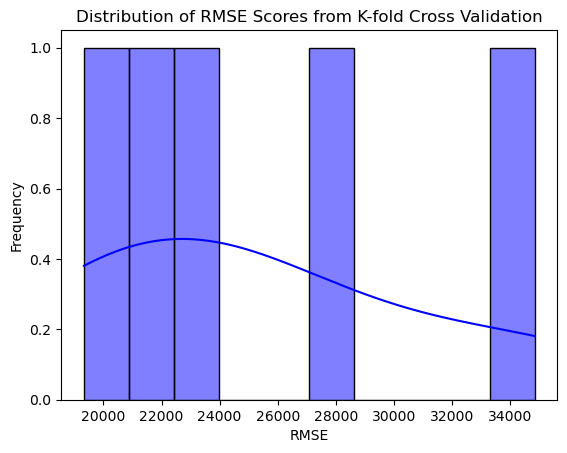

In [81]:
# 5. 결과 시각화
# K-fold RMSE 분포
sns.histplot(rmse_scores, kde=True, bins=10, color='blue')
plt.title("Distribution of RMSE Scores from K-fold Cross Validation")
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.show()

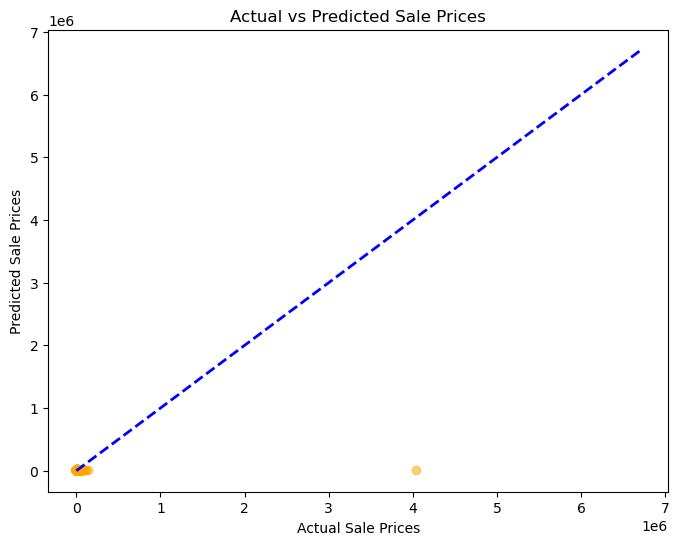

In [82]:
# 실제 값 vs 예측 값 비교 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='blue', linewidth=2)
plt.title("Actual vs Predicted Sale Prices")
plt.xlabel("Actual Sale Prices")
plt.ylabel("Predicted Sale Prices")
plt.show()